In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
                                    StratifiedKFold, 
                                    cross_validate
                                    )
from sklearn.metrics import (
                            confusion_matrix, 
                            f1_score,
                            accuracy_score,
                            precision_score,
                            recall_score
                            )
warnings.filterwarnings('ignore')

# 1. Load the Data

In [2]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

# 2. Configure K-Fold CV

In [3]:
cv = StratifiedKFold(
                    n_splits=6,
                    random_state=42,
                    shuffle=True
                    )

In [4]:
model_lr = LogisticRegression(
                            random_state = 42,
                            max_iter = 1000      
                            )

In [5]:
cv_results = cross_validate(
                            model_lr,
                            X_train,
                            Y_train,
                            cv=cv, scoring='precision',
                            return_train_score=False
                            )

In [6]:
cv_results

{'fit_time': array([0.00999832, 0.0109973 , 0.00927186, 0.01017499, 0.00958657,
        0.00847554]),
 'score_time': array([0.00300503, 0.00250673, 0.00200129, 0.00199962, 0.00203919,
        0.00201678]),
 'test_score': array([0.74      , 0.70813845, 0.72829132, 0.74098672, 0.72488263,
        0.73030584])}

In [7]:
score_arr = ['accuracy', 'precision', 'recall', 'f1']
for score in score_arr:
    cv_results = cross_validate(
                                model_lr,
                                X_train,
                                Y_train,
                                cv=cv, scoring=score,
                                return_train_score=False
                                )
    test_score = cv_results['test_score']
    test_score_avg = np.mean(test_score)

    print(f"{score} : {test_score_avg}")

accuracy : 0.7306608765891984
precision : 0.728767491464764
recall : 0.7349241825841353
f1 : 0.7318169755021501


In [8]:
cv_results = cross_validate(
                            model_lr,
                            X_train, Y_train,
                            cv=cv, scoring='f1',
                            return_train_score=False
                            )
cv_results

{'fit_time': array([0.01267767, 0.01076984, 0.04496479, 0.01501203, 0.00999928,
        0.00850725]),
 'score_time': array([0.0010004 , 0.00164342, 0.00276136, 0.00251532, 0.00210667,
        0.00199962]),
 'test_score': array([0.73789174, 0.71247059, 0.73377234, 0.74063537, 0.72795851,
        0.7381733 ])}

In [9]:
best_index = np.argmax(cv_results['test_score'])
fold_indices = list(cv.split(X_train, Y_train))

best_train_idx, best_test_idx = fold_indices[best_index]

X_train_best = X_train[best_train_idx]
Y_train_best = Y_train[best_train_idx]
X_test_best = X_train[best_test_idx]
Y_test_best = Y_train[best_test_idx]

In [10]:
model_lr = LogisticRegression(
                            random_state = 42,
                            max_iter = 1000      
                            )
model_lr.fit(X_train_best, Y_train_best)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [11]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

# 3. Evaluate

In [12]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1_score = f1_score(Y_test, Y_hat_test)

In [13]:
print(f"accuracy : {accuracy}")
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"f1_score : {f1_score}")

accuracy : 0.6948474237118559
precision : 0.3392857142857143
recall : 0.6569148936170213
f1_score : 0.447463768115942


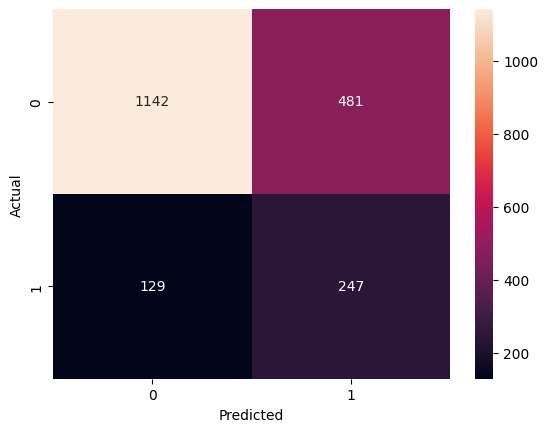

In [14]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
